In [ ]:
install.packages("car")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘matrixStats’, ‘RcppArmadillo’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘statmod’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’




In [ ]:
install.packages("e1071")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’




In [ ]:
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘plyr’, ‘ModelMetrics’, ‘reshape2’, ‘recipes’, ‘pROC’




In [ ]:
install.packages("cowplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("caTools")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’




In [ ]:
install.packages("pROC")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("ggcorrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
## Importing packages
library(tidyverse) 
library(MASS)
library(car)
library(e1071)
library(caret)
library(cowplot)
library(caTools)
library(pROC)
library(ggcorrplot)

# list.files(path = "../input")

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.1     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects

In [ ]:
telco <- read.csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

7043 observations with 21 variables.

In [ ]:
glimpse(telco)

Rows: 7,043
Columns: 21
$ customerID       <chr> "7590-VHVEG", "5575-GNVDE", "3668-QPYBK", "7795-CFOCW…
$ gender           <chr> "Female", "Male", "Male", "Male", "Female", "Female",…
$ SeniorCitizen    <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ Partner          <chr> "Yes", "No", "No", "No", "No", "No", "No", "No", "Yes…
$ Dependents       <chr> "No", "No", "No", "No", "No", "No", "Yes", "No", "No"…
$ tenure           <int> 1, 34, 2, 45, 2, 8, 22, 10, 28, 62, 13, 16, 58, 49, 2…
$ PhoneService     <chr> "No", "Yes", "Yes", "No", "Yes", "Yes", "Yes", "No", …
$ MultipleLines    <chr> "No phone service", "No", "No", "No phone service", "…
$ InternetService  <chr> "DSL", "DSL", "DSL", "DSL", "Fiber optic", "Fiber opt…
$ OnlineSecurity   <chr> "No", "Yes", "Yes", "Yes", "No", "No", "No", "Yes", "…
$ OnlineBackup     <chr> "Yes", "No", "Yes", "No", "No", "No", "Yes", "No", "N…
$ DeviceProtection <chr> "No", "Yes", "No", "Yes", "No", "Yes", "No", "No", "Y…
$ TechSupport   

**Visualizing NAs in the columns:**

Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
Please use a list of either functions or lambdas: 

  # Simple named list: 
  list(mean = mean, median = median)

  # Auto named with `tibble::lst()`: 
  tibble::lst(mean, median)

  # Using lambdas
  list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


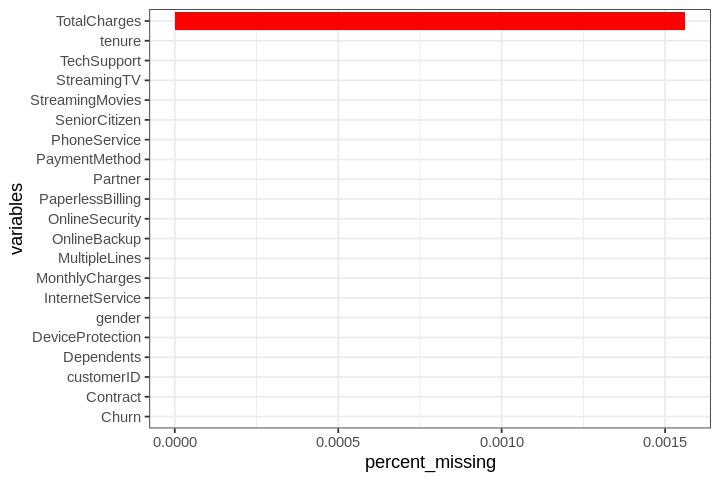

In [ ]:
options(repr.plot.width = 6, repr.plot.height = 4)
missing_data <- telco %>% summarise_all(funs(sum(is.na(.))/n()))
missing_data <- gather(missing_data, key = "variables", value = "percent_missing")
ggplot(missing_data, aes(x = reorder(variables, percent_missing), y = percent_missing)) +
geom_bar(stat = "identity", fill = "red", size = 0.3)+
xlab('variables')+
coord_flip()+ 
theme_bw()

* There are only 11 missing data in the TotalCharges field, so getting rid of those rows from the dataset.
* There are three continuous variables and they are Tenure, MonthlyCharges and TotalCharges. SeniorCitizen is in 'int' form, that can be changed to categorical.

In [ ]:
telco <- telco[complete.cases(telco),]

telco$SeniorCitizen <- as.factor(ifelse(telco$SeniorCitizen==1, 'YES', 'NO'))

**EXPLORATORY DATA ANALYSIS:**

In [ ]:
theme1 <- theme_bw()+
theme(axis.text.x = element_text(angle = 0, hjust = 1, vjust = 0.5),legend.position="none")
theme2 <- theme_bw()+
theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5),legend.position="none")

In [ ]:
glimpse(telco)

Rows: 7,032
Columns: 21
$ customerID       <chr> "7590-VHVEG", "5575-GNVDE", "3668-QPYBK", "7795-CFOCW…
$ gender           <chr> "Female", "Male", "Male", "Male", "Female", "Female",…
$ SeniorCitizen    <fct> NO, NO, NO, NO, NO, NO, NO, NO, NO, NO, NO, NO, NO, N…
$ Partner          <chr> "Yes", "No", "No", "No", "No", "No", "No", "No", "Yes…
$ Dependents       <chr> "No", "No", "No", "No", "No", "No", "Yes", "No", "No"…
$ tenure           <int> 1, 34, 2, 45, 2, 8, 22, 10, 28, 62, 13, 16, 58, 49, 2…
$ PhoneService     <chr> "No", "Yes", "Yes", "No", "Yes", "Yes", "Yes", "No", …
$ MultipleLines    <chr> "No phone service", "No", "No", "No phone service", "…
$ InternetService  <chr> "DSL", "DSL", "DSL", "DSL", "Fiber optic", "Fiber opt…
$ OnlineSecurity   <chr> "No", "Yes", "Yes", "Yes", "No", "No", "No", "Yes", "…
$ OnlineBackup     <chr> "Yes", "No", "Yes", "No", "No", "No", "Yes", "No", "N…
$ DeviceProtection <chr> "No", "Yes", "No", "Yes", "No", "Yes", "No", "No", "Y…
$ TechSupport   

**VISUALIZING THE CATEGORICAL DATA FIRST WITH RESPECT TO CHURN:**

* CHURN columns tells us about the number of Customers who left within the last month. 
* Around 26% of customers left the platform within the last month.

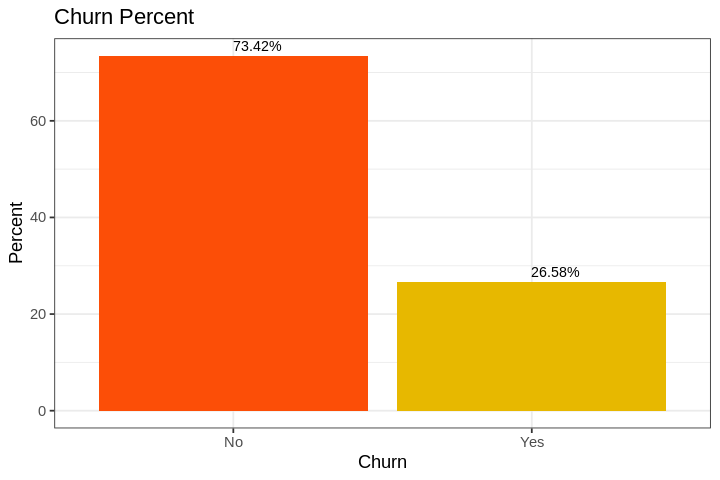

In [ ]:
options(repr.plot.width = 6, repr.plot.height = 4)
telco %>% 
group_by(Churn) %>% 
summarise(Count = n())%>% 
mutate(percent = prop.table(Count)*100)%>%
ggplot(aes(reorder(Churn, -percent), percent))+
geom_col(fill = c("#FC4E07", "#E7B800"))+
geom_text(aes(label = sprintf("%.2f%%", percent)), hjust = 0.01,vjust = -0.5, size =3)+ 
theme_bw()+  
xlab("Churn") + 
ylab("Percent")+
ggtitle("Churn Percent")

* **Gender **- The churn percent is almost equal in case of Male and Females
* The percent of churn is higher in case of **senior citizens**
* Customers with** Partners** and **Dependents** have lower churn rate as compared to those who don't have partners & Dependents.

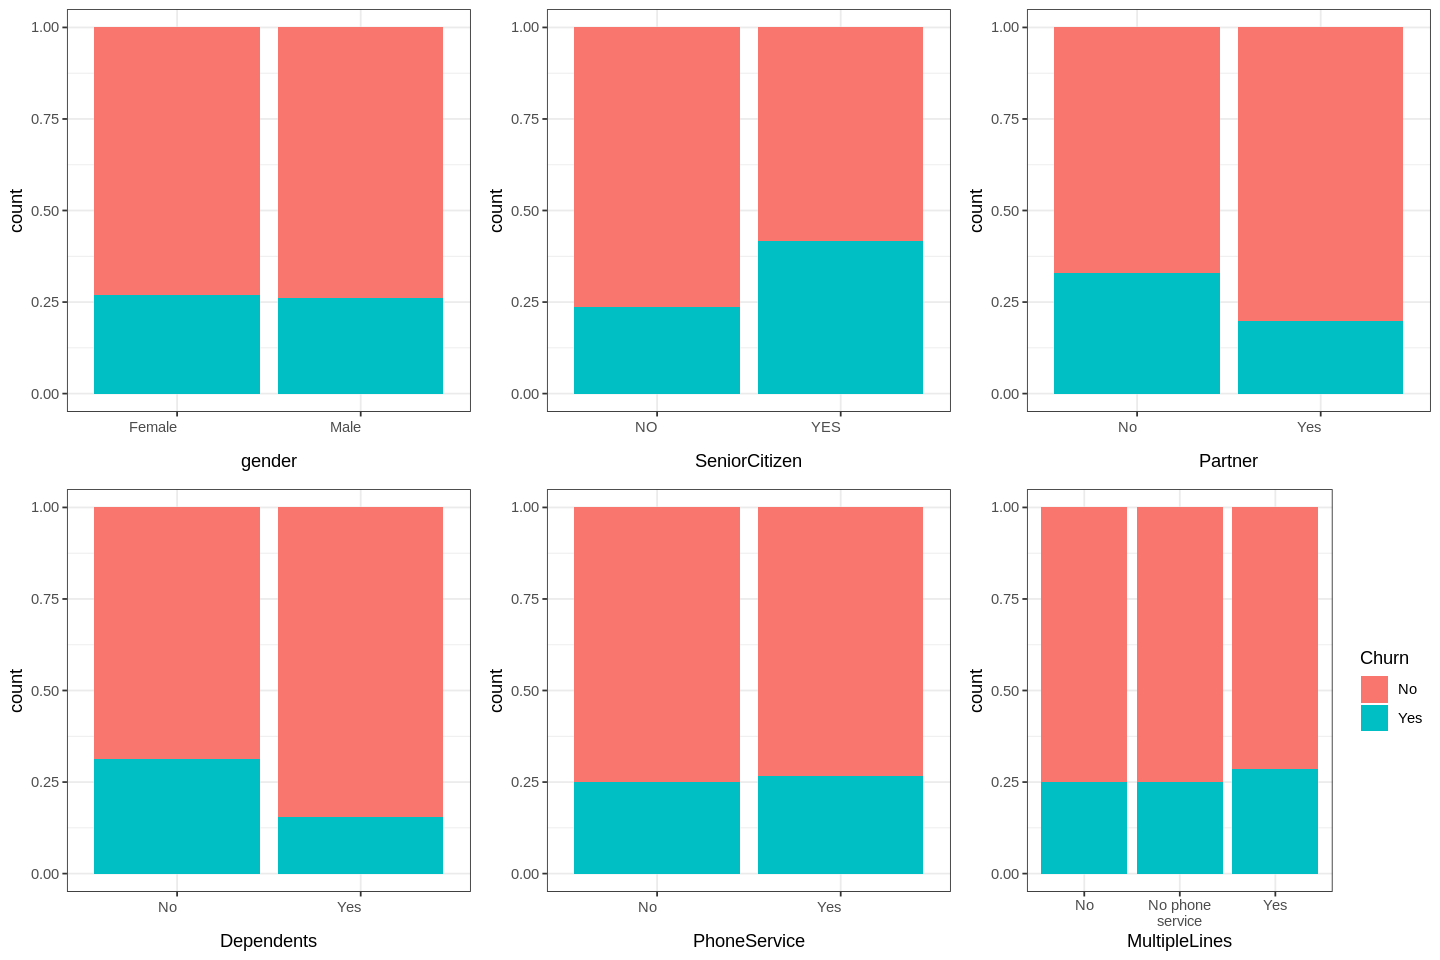

In [ ]:
options(repr.plot.width = 12, repr.plot.height = 8)
plot_grid(ggplot(telco, aes(x=gender,fill=Churn))+ geom_bar(position = 'fill')+ theme1, 
          ggplot(telco, aes(x=SeniorCitizen,fill=Churn))+ geom_bar(position = 'fill')+theme1,
          ggplot(telco, aes(x=Partner,fill=Churn))+ geom_bar(position = 'fill')+theme1,
          ggplot(telco, aes(x=Dependents,fill=Churn))+ geom_bar(position = 'fill')+theme1,
          ggplot(telco, aes(x=PhoneService,fill=Churn))+ geom_bar(position = 'fill')+theme1,
          ggplot(telco, aes(x=MultipleLines,fill=Churn))+ geom_bar(position = 'fill')+theme_bw()+
          scale_x_discrete(labels = function(x) str_wrap(x, width = 10)),
          align = "h")   

* Churn rate is much **higher** in case of **Fiber Optic InternetServices.**
* Customers who do not have services like **No OnlineSecurity **, **OnlineBackup** and ** TechSupport** have left the platform in the past month.


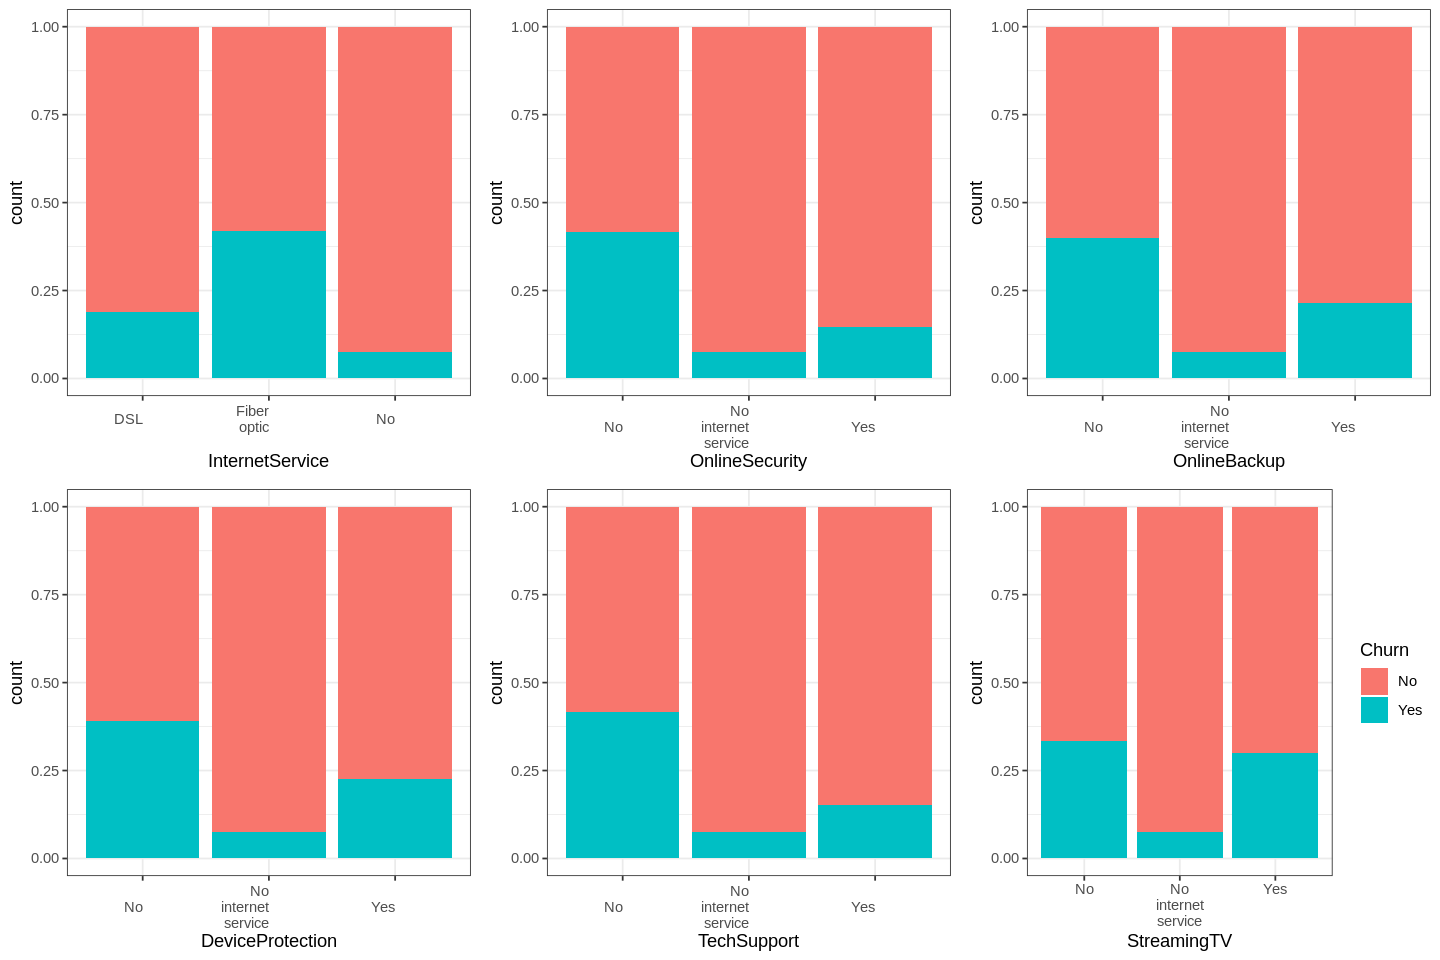

In [ ]:
options(repr.plot.width = 12, repr.plot.height = 8)
plot_grid(ggplot(telco, aes(x=InternetService,fill=Churn))+ geom_bar(position = 'fill')+ theme1+
          scale_x_discrete(labels = function(x) str_wrap(x, width = 10)), 
          ggplot(telco, aes(x=OnlineSecurity,fill=Churn))+ geom_bar(position = 'fill')+theme1+
          scale_x_discrete(labels = function(x) str_wrap(x, width = 10)),
          ggplot(telco, aes(x=OnlineBackup,fill=Churn))+ geom_bar(position = 'fill')+theme1+
          scale_x_discrete(labels = function(x) str_wrap(x, width = 10)),
          ggplot(telco, aes(x=DeviceProtection,fill=Churn))+ geom_bar(position = 'fill')+theme1+
          scale_x_discrete(labels = function(x) str_wrap(x, width = 10)),
          ggplot(telco, aes(x=TechSupport,fill=Churn))+ geom_bar(position = 'fill')+theme1+
          scale_x_discrete(labels = function(x) str_wrap(x, width = 10)),
          ggplot(telco, aes(x=StreamingTV,fill=Churn))+ geom_bar(position = 'fill')+theme_bw()+
          scale_x_discrete(labels = function(x) str_wrap(x, width = 10)),
          align = "h")  

* A larger percent of Customers with **monthly subscription** have **left** when compared to Customers with one or two year contract.
* **Churn** percent is** higher** in case of cutsomers having **paperless billing option**.
* Customers who have **ElectronicCheck** PaymentMethod tend to **leave** the platform more when compared to other options.


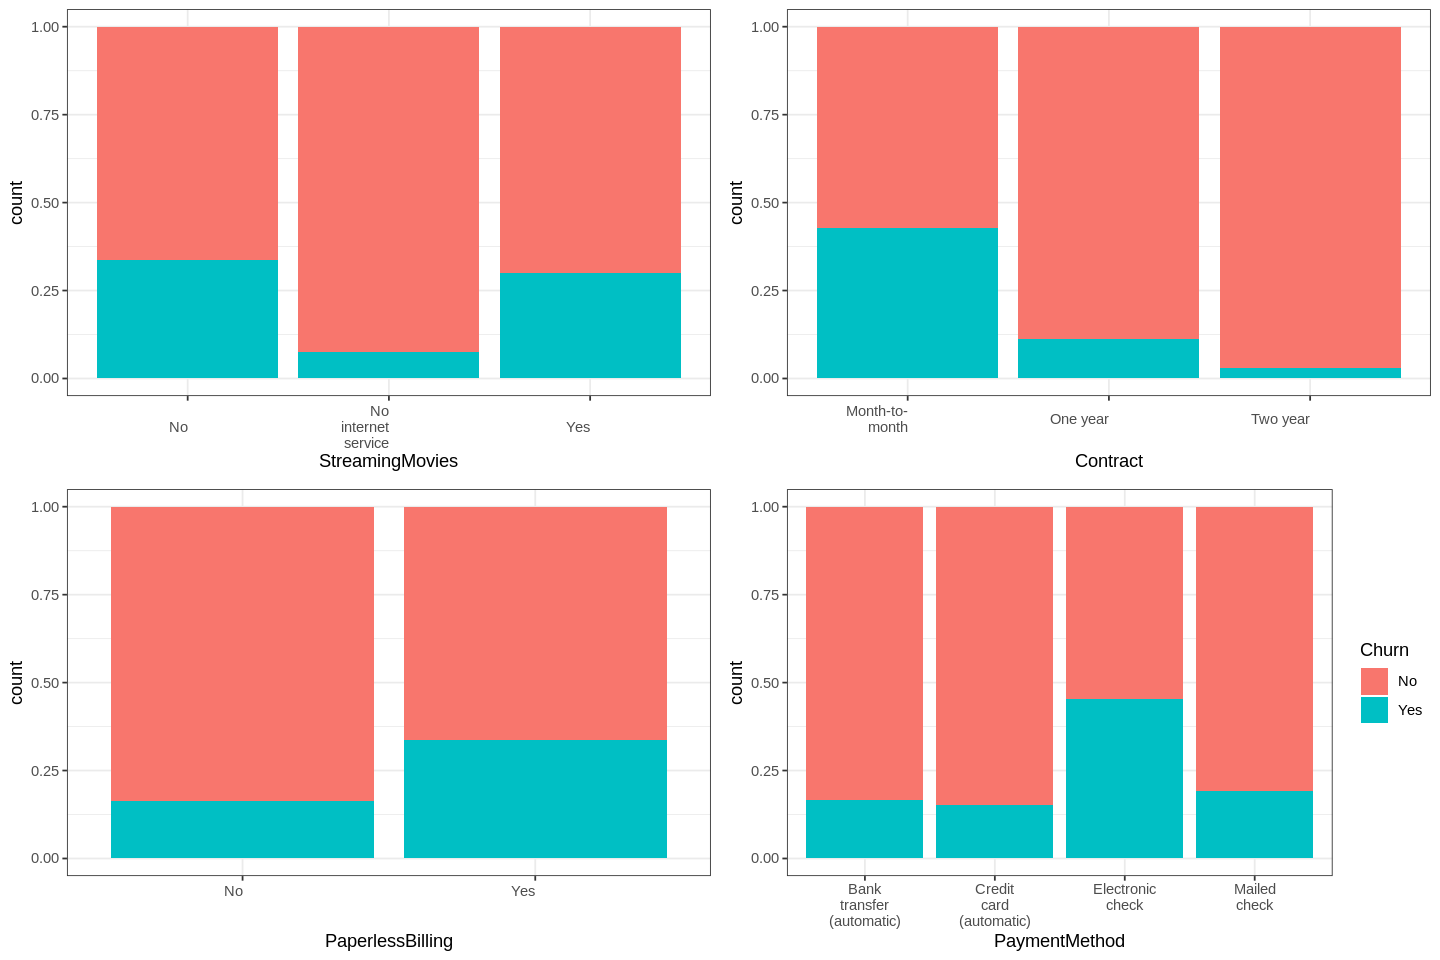

In [ ]:
plot_grid(ggplot(telco, aes(x=StreamingMovies,fill=Churn))+ 
          geom_bar(position = 'fill')+ theme1+
          scale_x_discrete(labels = function(x) str_wrap(x, width = 10)), 
          ggplot(telco, aes(x=Contract,fill=Churn))+ 
          geom_bar(position = 'fill')+theme1+
          scale_x_discrete(labels = function(x) str_wrap(x, width = 10)),
          ggplot(telco, aes(x=PaperlessBilling,fill=Churn))+ 
          geom_bar(position = 'fill')+theme1+
          scale_x_discrete(labels = function(x) str_wrap(x, width = 10)),
          ggplot(telco, aes(x=PaymentMethod,fill=Churn))+
          geom_bar(position = 'fill')+theme_bw()+
          scale_x_discrete(labels = function(x) str_wrap(x, width = 10)),
          align = "h")  

**Analyzing the three continuous variables w.r.t CHURN:**

**Tenure:** The median tenure for customers who have left is around 10 months.

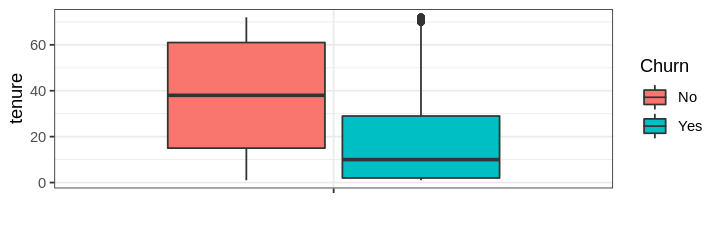

In [ ]:
options(repr.plot.width =6, repr.plot.height = 2)
ggplot(telco, aes(y= tenure, x = "", fill = Churn)) + 
geom_boxplot()+ 
theme_bw()+
xlab(" ")

**MonthlyCharges:** Customers who have churned, have high monthly charges. The median is above 75.

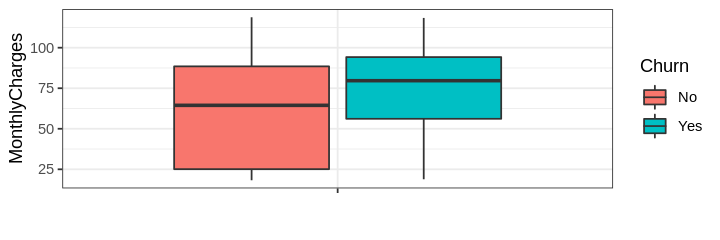

In [ ]:
ggplot(telco, aes(y= MonthlyCharges, x = "", fill = Churn)) + 
geom_boxplot()+ 
theme_bw()+
xlab(" ")

**TotalCharges:*** The median Total charges of customers who have churned is low.

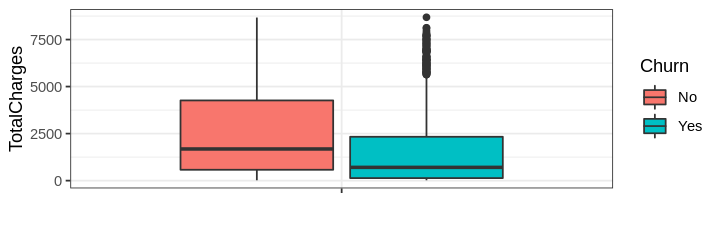

In [ ]:
ggplot(telco, aes(y= TotalCharges, x = "", fill = Churn)) + 
geom_boxplot()+ 
theme_bw()+
xlab(" ")

**Checking the correlation between continuous variables**

Total Charges has positive correlation with MonthlyCharges and tenure.

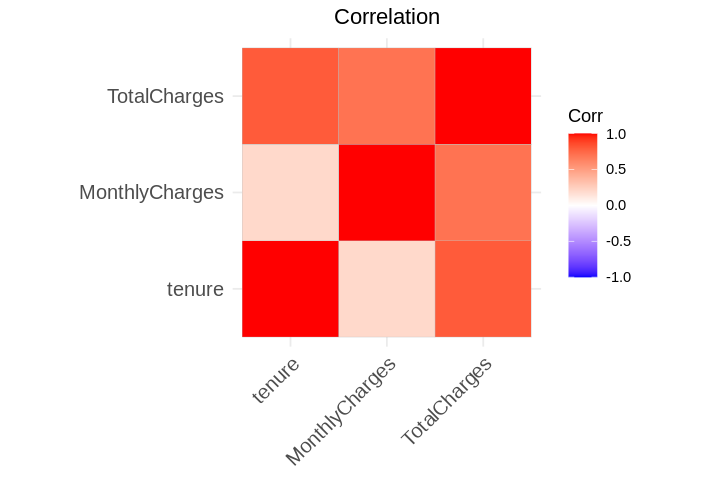

In [ ]:
options(repr.plot.width =6, repr.plot.height = 4)
telco_cor <- round(cor(telco[,c("tenure", "MonthlyCharges", "TotalCharges")]), 1)

ggcorrplot(telco_cor,  title = "Correlation")+theme(plot.title = element_text(hjust = 0.5))

Checking for **outliers** in the continuous variables, and it seems none of the values are beyond the whiskers here.

numeric(0)

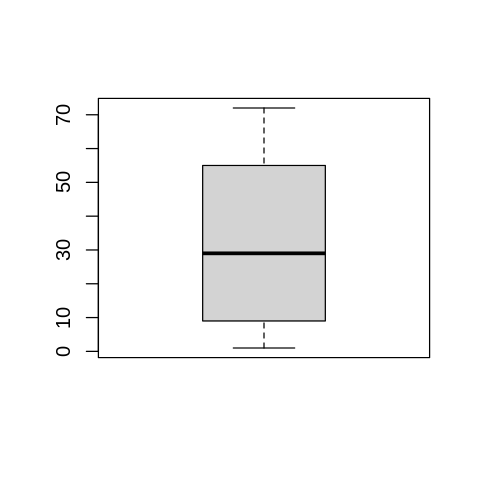

In [ ]:
options(repr.plot.width =4, repr.plot.height = 4)
boxplot(telco$tenure)$out

numeric(0)

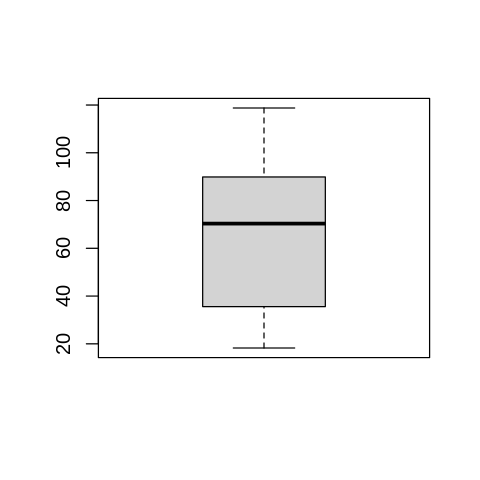

In [ ]:
boxplot(telco$MonthlyCharges)$out


numeric(0)

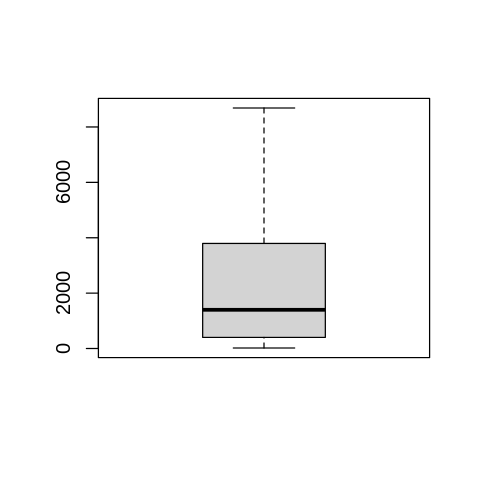

In [ ]:
boxplot(telco$TotalCharges)$out

**DATA PREPARATION: **
* Cleaning the Categorical features
* Standardising Continuous features
* Creating derived features
* Creating dummy variables for factor variables
* Creating the final dataset
* Splitting the data into train and validation set.

*Cleaning the Categorical features*

From the EDA above, we know that there are some categorical features that have 'No' and 'No Internet Service' or 'No Phone Service' as a category, we can make them as 'No' and clean these features.

In [ ]:
telco <- data.frame(lapply(telco, function(x) {
                  gsub("No internet service", "No", x)}))

telco <- data.frame(lapply(telco, function(x) {
                  gsub("No phone service", "No", x)}))

*Standardising Continuous features*

In [ ]:
num_columns <- c("tenure", "MonthlyCharges", "TotalCharges")
telco[num_columns] <- sapply(telco[num_columns], as.numeric)

telco_int <- telco[,c("tenure", "MonthlyCharges", "TotalCharges")]
telco_int <- data.frame(scale(telco_int))


*Creating derived features*

trying to create a derived feature from tenure, where i have made different bins of tenure(which is in months) such as '0-1 year', '2-3 years', '3-4 years' etc.

In [ ]:
#max(telco$tenure)
#min(telco$tenure)
telco <- mutate(telco, tenure_bin = tenure)

telco$tenure_bin[telco$tenure_bin >=0 & telco$tenure_bin <= 12] <- '0-1 year'
telco$tenure_bin[telco$tenure_bin > 12 & telco$tenure_bin <= 24] <- '1-2 years'
telco$tenure_bin[telco$tenure_bin > 24 & telco$tenure_bin <= 36] <- '2-3 years'
telco$tenure_bin[telco$tenure_bin > 36 & telco$tenure_bin <= 48] <- '3-4 years'
telco$tenure_bin[telco$tenure_bin > 48 & telco$tenure_bin <= 60] <- '4-5 years'
telco$tenure_bin[telco$tenure_bin > 60 & telco$tenure_bin <= 72] <- '5-6 years'

telco$tenure_bin <- as.factor(telco$tenure_bin)

After checking the distribution of data in each tenure bin, we found that maximum number of customers have a tenure of either 0-1 years and followed by 5-6 years.

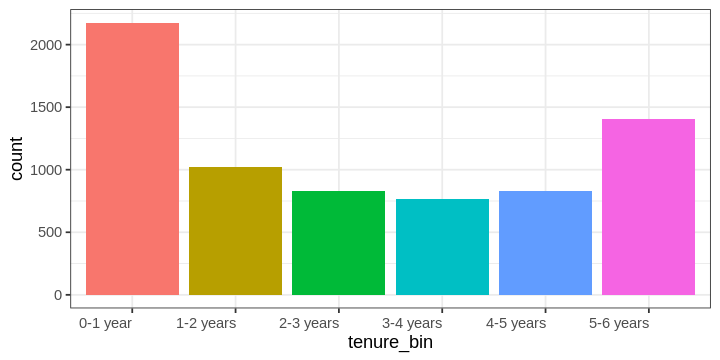

In [ ]:
options(repr.plot.width = 6, repr.plot.height = 3)
ggplot(telco, aes(tenure_bin, fill = tenure_bin)) + geom_bar()+ theme1

*Creating Dummy Variables*

In [ ]:
telco_cat <- telco[,-c(1,6,19,20)]

#Creating Dummy Variables
dummy<- data.frame(sapply(telco_cat,function(x) data.frame(model.matrix(~0+x,data = telco_cat))[,-1]))

head(dummy)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService.xFiber.optic,InternetService.xNo,OnlineSecurity,OnlineBackup,⋯,PaperlessBilling,PaymentMethod.xCredit.card..automatic.,PaymentMethod.xElectronic.check,PaymentMethod.xMailed.check,Churn,tenure_bin.x1.2.years,tenure_bin.x2.3.years,tenure_bin.x3.4.years,tenure_bin.x4.5.years,tenure_bin.x5.6.years
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,1,0,0,0,0,0,0,1,⋯,1,0,1,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,1,0,⋯,0,0,0,1,0,0,1,0,0,0
3,1,0,0,0,1,0,0,0,1,1,⋯,1,0,0,1,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,1,0,0
5,0,0,0,0,1,0,1,0,0,0,⋯,1,0,1,0,1,0,0,0,0,0
6,0,0,0,0,1,1,1,0,0,0,⋯,1,0,1,0,1,0,0,0,0,0


*Creating the final dataset by combining the numeric and dummy data frames.*

In [ ]:
#Combining the data
telco_final <- cbind(telco_int,dummy)
head(telco_final)

,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService.xFiber.optic,⋯,PaperlessBilling,PaymentMethod.xCredit.card..automatic.,PaymentMethod.xElectronic.check,PaymentMethod.xMailed.check,Churn,tenure_bin.x1.2.years,tenure_bin.x2.3.years,tenure_bin.x3.4.years,tenure_bin.x4.5.years,tenure_bin.x5.6.years
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-1.28015700,-1.1616113,-0.9941234,0,0,1,0,0,0,0,⋯,1,0,1,0,0,0,0,0,0,0
2,0.06429811,-0.2608594,-0.1737275,1,0,0,0,1,0,0,⋯,0,0,0,1,0,0,1,0,0,0
3,-1.23941594,-0.3638974,-0.9595809,1,0,0,0,1,0,0,⋯,1,0,0,1,1,0,0,0,0,0
4,0.51244982,-0.7477972,-0.1952338,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,1,0,0
5,-1.23941594,0.1961642,-0.9403906,0,0,0,0,1,0,1,⋯,1,0,1,0,1,0,0,0,0,0
6,-0.99496955,1.1584066,-0.6453233,0,0,0,0,1,1,1,⋯,1,0,1,0,1,0,0,0,0,0


*Splitting the data into train and validation data.*

In [ ]:
#Splitting the data
set.seed(123)
indices = sample.split(telco_final$Churn, SplitRatio = 0.7)
train = telco_final[indices,]
validation = telco_final[!(indices),]

**MODEL BUILDING 1**

**Starting with Logistic Regression**

In [ ]:
#Build the first model using all variables
model_1 = glm(Churn ~ ., data = train, family = "binomial")
summary(model_1) 


Call:
glm(formula = Churn ~ ., family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0959  -0.6765  -0.2674   0.6331   3.3919  

Coefficients:
                                        Estimate Std. Error z value Pr(>|z|)
(Intercept)                            -4.711690   1.580952  -2.980 0.002880
tenure                                 -2.419264   0.319733  -7.567 3.83e-14
MonthlyCharges                         -1.523039   1.152472  -1.322 0.186321
TotalCharges                            0.236922   0.200225   1.183 0.236699
gender                                 -0.004319   0.078799  -0.055 0.956292
SeniorCitizen                           0.342668   0.102039   3.358 0.000784
Partner                                 0.049639   0.095330   0.521 0.602570
Dependents                             -0.148501   0.110427  -1.345 0.178693
PhoneService                            0.597310   0.785026   0.761 0.446729
MultipleLines                     

Using stepAIC for variable selection, which is a iterative process of adding or removing variables, in order to get a subset of variables that gives the best performing model.

In [ ]:
model_2<- stepAIC(model_1, direction="both")

Start:  AIC=4041.29
Churn ~ tenure + MonthlyCharges + TotalCharges + gender + SeniorCitizen + 
    Partner + Dependents + PhoneService + MultipleLines + InternetService.xFiber.optic + 
    InternetService.xNo + OnlineSecurity + OnlineBackup + DeviceProtection + 
    TechSupport + StreamingTV + StreamingMovies + Contract.xOne.year + 
    Contract.xTwo.year + PaperlessBilling + PaymentMethod.xCredit.card..automatic. + 
    PaymentMethod.xElectronic.check + PaymentMethod.xMailed.check + 
    tenure_bin.x1.2.years + tenure_bin.x2.3.years + tenure_bin.x3.4.years + 
    tenure_bin.x4.5.years + tenure_bin.x5.6.years

                                         Df Deviance    AIC
- gender                                  1   3983.3 4039.3
- TechSupport                             1   3983.3 4039.3
- PaymentMethod.xCredit.card..automatic.  1   3983.4 4039.4
- Partner                                 1   3983.6 4039.6
- PaymentMethod.xMailed.check             1   3983.6 4039.6
- OnlineBackup        

In [ ]:
summary(model_2)


Call:
glm(formula = Churn ~ tenure + MonthlyCharges + SeniorCitizen + 
    MultipleLines + InternetService.xFiber.optic + InternetService.xNo + 
    OnlineSecurity + StreamingTV + StreamingMovies + Contract.xOne.year + 
    Contract.xTwo.year + PaperlessBilling + PaymentMethod.xElectronic.check + 
    tenure_bin.x2.3.years + tenure_bin.x3.4.years + tenure_bin.x4.5.years + 
    tenure_bin.x5.6.years + TechSupport, family = "binomial", 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1461  -0.6661  -0.2733   0.6249   3.3018  

Coefficients:
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                     -3.37123    0.27189 -12.399  < 2e-16 ***
tenure                          -2.07853    0.17751 -11.709  < 2e-16 ***
MonthlyCharges                  -0.52335    0.19800  -2.643 0.008213 ** 
SeniorCitizen                    0.37111    0.10031   3.700 0.000216 ***
MultipleLines                    0.38516    0.10

We can use variance inflation factor (vif) to get rid of redundant predictors or the variables that have high multicollinearity between them. 

In [ ]:
vif(model_2)

tenure                  MonthlyCharges 
                      15.076710                       20.162188 
                  SeniorCitizen                   MultipleLines 
                       1.100707                        1.838876 
   InternetService.xFiber.optic             InternetService.xNo 
                       8.225529                        2.489968 
                 OnlineSecurity                     StreamingTV 
                       1.246308                        2.206225 
                StreamingMovies              Contract.xOne.year 
                       2.122071                        1.386381 
             Contract.xTwo.year                PaperlessBilling 
                       1.371229                        1.125064 
PaymentMethod.xElectronic.check           tenure_bin.x2.3.years 
                       1.149683                        2.656673 
          tenure_bin.x3.4.years           tenure_bin.x4.5.years 
                       4.106103                        6.527227 
          tenure_bin.x5.6.years                     TechSupport 
                       8.568998                        1.332821

In [ ]:
#Removing DeviceProtection due to high p-value 
model_3 <-glm(formula = Churn ~ tenure + MonthlyCharges + SeniorCitizen + 
    Partner + InternetService.xFiber.optic + InternetService.xNo + 
    OnlineSecurity + OnlineBackup + TechSupport + 
    StreamingTV + Contract.xOne.year + Contract.xTwo.year + PaperlessBilling + 
    PaymentMethod.xElectronic.check + tenure_bin.x1.2.years + 
    tenure_bin.x5.6.years, family = "binomial", data = train)
summary(model_3)
vif(model_3)


Call:
glm(formula = Churn ~ tenure + MonthlyCharges + SeniorCitizen + 
    Partner + InternetService.xFiber.optic + InternetService.xNo + 
    OnlineSecurity + OnlineBackup + TechSupport + StreamingTV + 
    Contract.xOne.year + Contract.xTwo.year + PaperlessBilling + 
    PaymentMethod.xElectronic.check + tenure_bin.x1.2.years + 
    tenure_bin.x5.6.years, family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9863  -0.6589  -0.2775   0.6424   3.2758  

Coefficients:
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                     -1.48117    0.17354  -8.535  < 2e-16 ***
tenure                          -0.88438    0.07316 -12.088  < 2e-16 ***
MonthlyCharges                   0.08404    0.15461   0.544 0.586731    
SeniorCitizen                    0.37893    0.09935   3.814 0.000137 ***
Partner                         -0.02734    0.08496  -0.322 0.747590    
InternetService.xFiber.optic     0.73

tenure                  MonthlyCharges 
                       2.540970                       12.310900 
                  SeniorCitizen                         Partner 
                       1.092995                        1.133093 
   InternetService.xFiber.optic             InternetService.xNo 
                       6.398204                        2.142763 
                 OnlineSecurity                    OnlineBackup 
                       1.180975                        1.288093 
                    TechSupport                     StreamingTV 
                       1.271133                        2.122655 
             Contract.xOne.year              Contract.xTwo.year 
                       1.360444                        1.392469 
               PaperlessBilling PaymentMethod.xElectronic.check 
                       1.120396                        1.141949 
          tenure_bin.x1.2.years           tenure_bin.x5.6.years 
                       1.028052                        1.757701

In [ ]:
#Removing StreamingTV  as it has high p-value 

model_4 <- glm(formula = Churn ~ tenure + MonthlyCharges + SeniorCitizen + 
    Partner + InternetService.xFiber.optic + InternetService.xNo + 
    OnlineSecurity + OnlineBackup + TechSupport +  
    Contract.xOne.year + Contract.xTwo.year + PaperlessBilling + 
    PaymentMethod.xElectronic.check + tenure_bin.x1.2.years + 
    tenure_bin.x5.6.years, family = "binomial", data = train)

summary(model_4)
vif(model_4)


Call:
glm(formula = Churn ~ tenure + MonthlyCharges + SeniorCitizen + 
    Partner + InternetService.xFiber.optic + InternetService.xNo + 
    OnlineSecurity + OnlineBackup + TechSupport + Contract.xOne.year + 
    Contract.xTwo.year + PaperlessBilling + PaymentMethod.xElectronic.check + 
    tenure_bin.x1.2.years + tenure_bin.x5.6.years, family = "binomial", 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9552  -0.6643  -0.2791   0.6644   3.2717  

Coefficients:
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                     -1.24627    0.15025  -8.295  < 2e-16 ***
tenure                          -0.87338    0.07296 -11.970  < 2e-16 ***
MonthlyCharges                   0.35114    0.12173   2.885 0.003918 ** 
SeniorCitizen                    0.37827    0.09923   3.812 0.000138 ***
Partner                         -0.02668    0.08487  -0.314 0.753275    
InternetService.xFiber.optic     0.45825    0.17270

tenure                  MonthlyCharges 
                       2.528728                        7.598828 
                  SeniorCitizen                         Partner 
                       1.092734                        1.133297 
   InternetService.xFiber.optic             InternetService.xNo 
                       4.776780                        1.985836 
                 OnlineSecurity                    OnlineBackup 
                       1.143833                        1.258626 
                    TechSupport              Contract.xOne.year 
                       1.252283                        1.358085 
             Contract.xTwo.year                PaperlessBilling 
                       1.390401                        1.114992 
PaymentMethod.xElectronic.check           tenure_bin.x1.2.years 
                       1.131205                        1.027896 
          tenure_bin.x5.6.years 
                       1.752778

Model_3 all has significant variables, so let's just use it for prediction first

In [ ]:
final_model <- model_3

**Model Evaluation using the validation data:**

In [ ]:
pred <- predict(final_model, type = "response", newdata = validation[,-24])
summary(pred)
validation$prob <- pred

# Using probability cutoff of 50%.

pred_churn <- factor(ifelse(pred >= 0.50, "Yes", "No"))
actual_churn <- factor(ifelse(validation$Churn==1,"Yes","No"))
table(actual_churn,pred_churn)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.004518 0.041437 0.186763 0.268617 0.470467 0.868907 

            pred_churn
actual_churn   No  Yes
         No  1382  167
         Yes  275  286

Let's find the Accuracy, Sensitivity, Specificity using 50% cutoff

In [ ]:
cutoff_churn <- factor(ifelse(pred >=0.50, "Yes", "No"))
conf_final <- confusionMatrix(cutoff_churn, actual_churn, positive = "Yes")
accuracy <- conf_final$overall[1]
sensitivity <- conf_final$byClass[1]
specificity <- conf_final$byClass[2]
accuracy
sensitivity
specificity

Accuracy 
0.7905213

Sensitivity 
  0.5098039

Specificity 
  0.8921885

As we can see above, when we are using a cutoff of 0.50, we are getting a good accuracy and specificity, but the sensitivity is very less. Hence, we need to find the optimal probalility cutoff which will give maximum accuracy, sensitivity and specificity

In [ ]:
perform_fn <- function(cutoff) 
{
  predicted_churn <- factor(ifelse(pred >= cutoff, "Yes", "No"))
  conf <- confusionMatrix(predicted_churn, actual_churn, positive = "Yes")
  accuray <- conf$overall[1]
  sensitivity <- conf$byClass[1]
  specificity <- conf$byClass[2]
  out <- t(as.matrix(c(sensitivity, specificity, accuray))) 
  colnames(out) <- c("sensitivity", "specificity", "accuracy")
  return(out)
}

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.004518 0.041437 0.186763 0.268617 0.470467 0.868907 

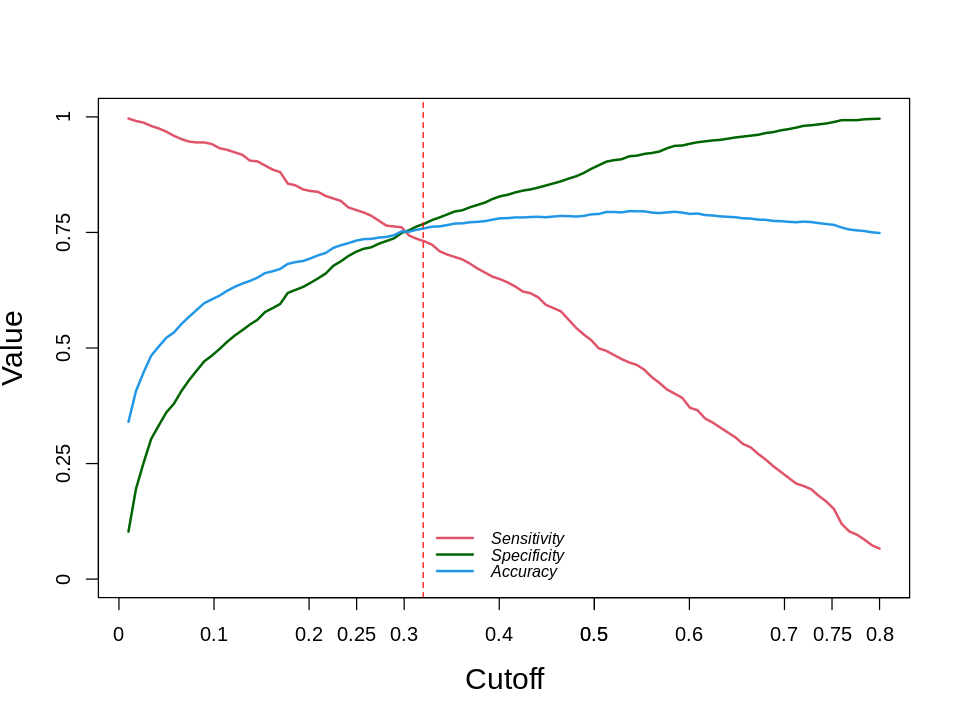

In [ ]:
options(repr.plot.width =8, repr.plot.height =6)
summary(pred)
s = seq(0.01,0.80,length=100)
OUT = matrix(0,100,3)

for(i in 1:100)
{
  OUT[i,] = perform_fn(s[i])
} 

plot(s, OUT[,1],xlab="Cutoff",ylab="Value",cex.lab=1.5,cex.axis=1.5,ylim=c(0,1),
     type="l",lwd=2,axes=FALSE,col=2)
axis(1,seq(0,1,length=5),seq(0,1,length=5),cex.lab=1.5)
axis(2,seq(0,1,length=5),seq(0,1,length=5),cex.lab=1.5)
lines(s,OUT[,2],col="darkgreen",lwd=2)
lines(s,OUT[,3],col=4,lwd=2)
box()
legend("bottom",col=c(2,"darkgreen",4,"darkred"),text.font =3,inset = 0.02,
       box.lty=0,cex = 0.8, 
       lwd=c(2,2,2,2),c("Sensitivity","Specificity","Accuracy"))
abline(v = 0.32, col="red", lwd=1, lty=2)
axis(1, at = seq(0.1, 1, by = 0.1))

#cutoff <- s[which(abs(OUT[,1]-OUT[,2])<0.01)]


Let's choose a cutoff value of 0.32 for final model, where the three curves for accuracy, specificty and sensitivity meet

In [ ]:
cutoff_churn <- factor(ifelse(pred >=0.32, "Yes", "No"))
conf_final <- confusionMatrix(cutoff_churn, actual_churn, positive = "Yes")
accuracy <- conf_final$overall[1]
sensitivity <- conf_final$byClass[1]
specificity <- conf_final$byClass[2]
accuracy
sensitivity
specificity


Accuracy 
0.7582938

Sensitivity 
  0.7308378

Specificity 
  0.7682376

Logistic Regression with a cutoff probability value of 0.32 gives us better values of accuracy, sensitivity and specificity in the validation data. 

**MODEL BUILDING 2**

**Decision Tree**

* **Preparing the Data**

In [ ]:
set.seed(123)
telco_final$Churn <- as.factor(telco_final$Churn)

indices = sample.split(telco_final$Churn, SplitRatio = 0.7)
train = telco_final[indices,]
validation = telco_final[!(indices),]

* **Training the Decision Tree model using all variables & Predicting in the validation data**

In [ ]:
install.packages("rpart.plot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
options(repr.plot.width = 10, repr.plot.height = 8)
library(rpart)
library(rpart.plot)

#Training
Dtree = rpart(Churn ~., data = train, method = "class")
summary(Dtree)

#Predicting 
DTPred <- predict(Dtree,type = "class", newdata = validation[,-24])

Call:
rpart(formula = Churn ~ ., data = train, method = "class")
  n= 4922 

         CP nsplit rel error    xerror       xstd
1 0.1100917      0 1.0000000 1.0000000 0.02369296
2 0.0100000      2 0.7798165 0.8012232 0.02195745

Variable importance
                         tenure                    TotalCharges 
                             28                              24 
   InternetService.xFiber.optic                  MonthlyCharges 
                             17                              16 
PaymentMethod.xElectronic.check                   MultipleLines 
                              5                               5 
                    StreamingTV     PaymentMethod.xMailed.check 
                              4                               1 
                        Partner 
                              1 

Node number 1: 4922 observations,    complexity param=0.1100917
  predicted class=0  expected loss=0.2657456  P(node) =1
    class counts:  3614  1308
   probabiliti

*** Checking the Confusion Matrix**

In [ ]:
confusionMatrix(validation$Churn, DTPred)

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1435  114
         1  343  218
                                          
               Accuracy : 0.7834          
                 95% CI : (0.7652, 0.8008)
    No Information Rate : 0.8427          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.3621          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.8071          
            Specificity : 0.6566          
         Pos Pred Value : 0.9264          
         Neg Pred Value : 0.3886          
             Prevalence : 0.8427          
         Detection Rate : 0.6801          
   Detection Prevalence : 0.7341          
      Balanced Accuracy : 0.7319          
                                          
       'Positive' Class : 0               
                        

The decision tree model (accuracy - 78.1%) gives slightly better accuracy with respect to the logistic regression model (accuracy 75%). 

**MODEL BUILDING 3:**

**RANDOM FOREST**

In [ ]:
install.packages("randomForest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(randomForest)
set.seed(123)
telco_final$Churn <- as.factor(telco_final$Churn)

indices = sample.split(telco_final$Churn, SplitRatio = 0.7)
train = telco_final[indices,]
validation = telco_final[!(indices),]

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




The OOB error estimate comes to around 20.87%, so the model has around 79% out of sample accuracy for the training set. Let's check the prediction and accuracy on our validation data.

In [ ]:
#Training the RandomForest Model

model.rf <- randomForest(Churn ~ ., data=train, proximity=FALSE,importance = FALSE,
                        ntree=500,mtry=4, do.trace=FALSE)
model.rf


Call:
 randomForest(formula = Churn ~ ., data = train, proximity = FALSE,      importance = FALSE, ntree = 500, mtry = 4, do.trace = FALSE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 19.59%
Confusion matrix:
     0   1 class.error
0 3258 356  0.09850581
1  608 700  0.46483180

The basic RandomForest model gives an accuracy of 78.86%( almost close enough to the OOB estimate),  Sensitivity 82.46% and Specificity 63.99%.,

In [ ]:
#Predicting on the validation set and checking the Confusion Matrix.
testPred <- predict(model.rf, newdata=validation[,-24])
table(testPred, validation$Churn)

confusionMatrix(validation$Churn, testPred)

        
testPred    0    1
       0 1392  283
       1  157  278

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1392  157
         1  283  278
                                          
               Accuracy : 0.7915          
                 95% CI : (0.7735, 0.8086)
    No Information Rate : 0.7938          
    P-Value [Acc > NIR] : 0.6182          
                                          
                  Kappa : 0.4246          
                                          
 Mcnemar's Test P-Value : 2.536e-09       
                                          
            Sensitivity : 0.8310          
            Specificity : 0.6391          
         Pos Pred Value : 0.8986          
         Neg Pred Value : 0.4955          
             Prevalence : 0.7938          
         Detection Rate : 0.6597          
   Detection Prevalence : 0.7341          
      Balanced Accuracy : 0.7351          
                                          
       'Positive' Class : 0               
                        

*Variable Importance Plot:*

Below is the variable importance plot, that shows the most significant attribute in decreasing order by mean decrease in Gini. The Mean decrease Gini measures how pure the nodes are at the end of the tree. Higher the Gini Index, better is the homogeneity.

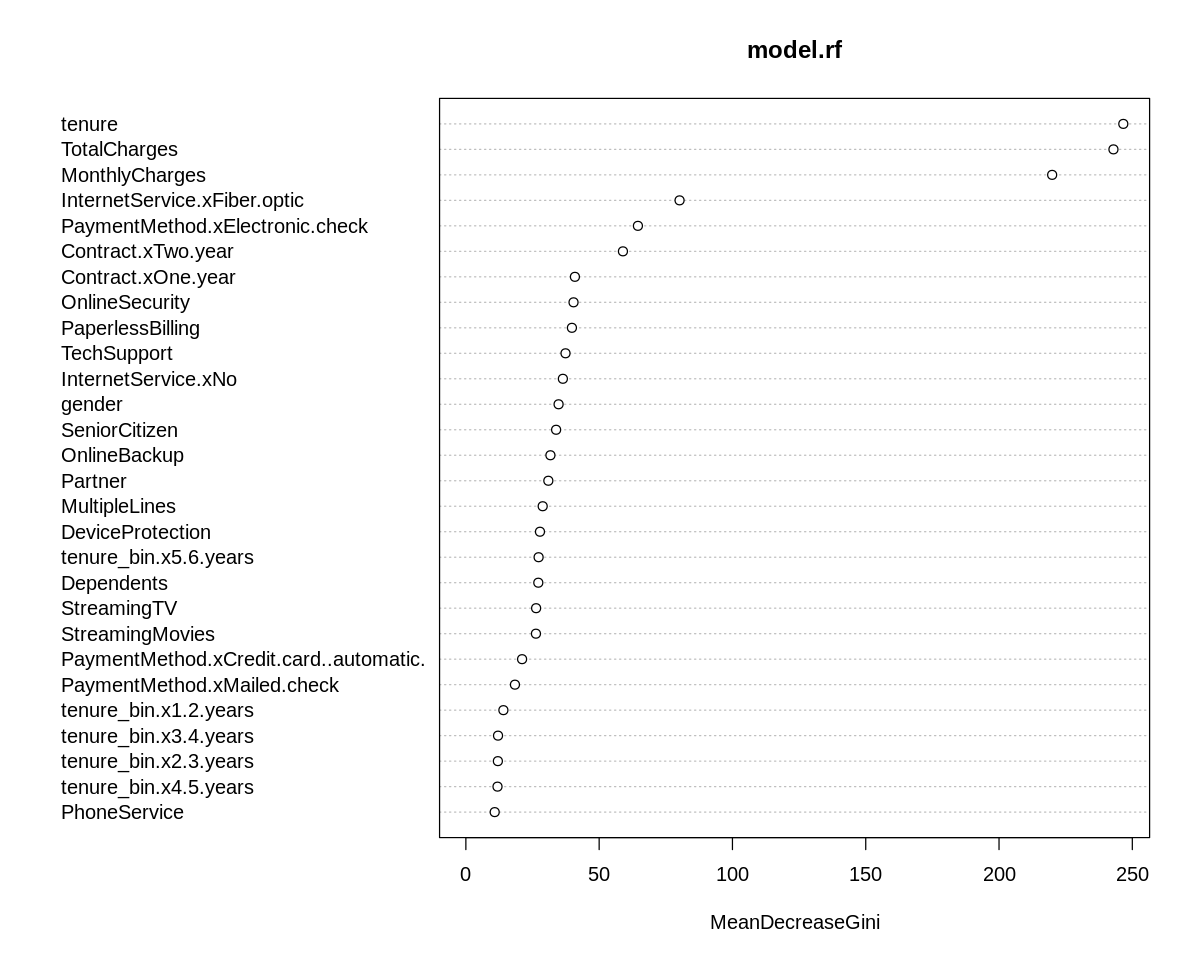

In [ ]:
#Checking the variable Importance Plot
varImpPlot(model.rf)

**Checking the AUC for all three models:**



Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



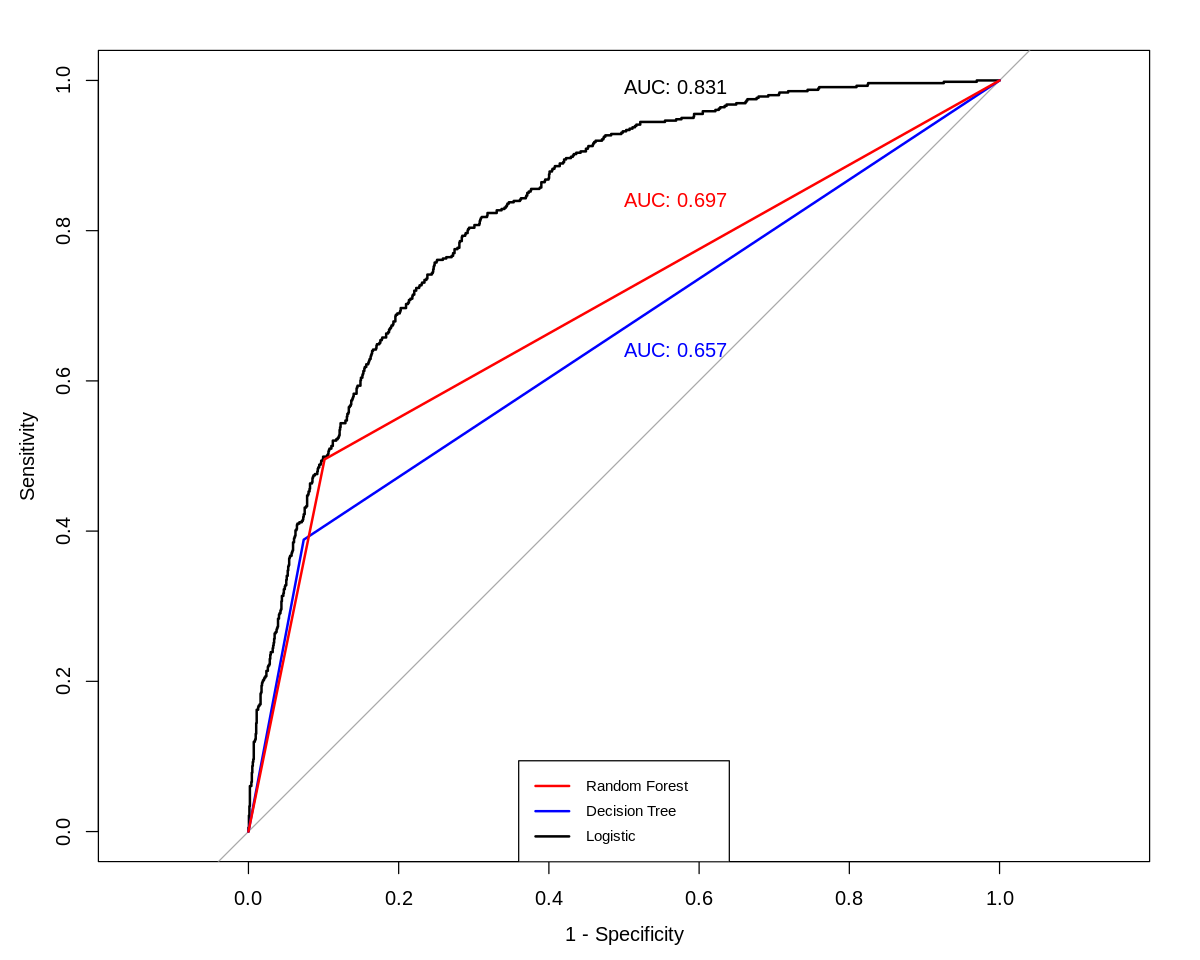

In [ ]:
options(repr.plot.width =10, repr.plot.height = 8)

glm.roc <- roc(response = validation$Churn, predictor = as.numeric(pred))
DT.roc <- roc(response = validation$Churn, predictor = as.numeric(DTPred))
rf.roc <- roc(response = validation$Churn, predictor = as.numeric(testPred))

plot(glm.roc,      legacy.axes = TRUE, print.auc.y = 1.0, print.auc = TRUE)
plot(DT.roc, col = "blue", add = TRUE, print.auc.y = 0.65, print.auc = TRUE)
plot(rf.roc, col = "red" , add = TRUE, print.auc.y = 0.85, print.auc = TRUE)
legend("bottom", c("Random Forest", "Decision Tree", "Logistic"),
       lty = c(1,1), lwd = c(2, 2), col = c("red", "blue", "black"), cex = 0.75)